In [1]:
# Install scikit-learn in your Jupyter environment
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.0 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.0 MB 1.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.0 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.0 MB 1.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.0 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.0 MB 1.8 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/8.0 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.0 MB 2.0 MB/s eta 0:00:03
   ----------------------- ----


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

C:\Users\kdhakal\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv(r"C:\Users\kdhakal\Documents\NLP\Dataset\book_reviews_sample.csv")

In [4]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [5]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [6]:
data['reveiewText_clean'] = data['reviewText'].str.lower()

In [7]:
data['reveiewText_clean'] = data.apply(lambda x: re.sub(r'[^\w\s]', '', x['reveiewText_clean']), axis=1)

In [8]:
data.head()

,index,reviewText,rating,reveiewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


VADER : a rule-based sentiment analysis tool that uses a lexicon of words and their associated sentiment scores to determine the sentiment of a given text.

In [9]:
vader_sentiment = SentimentIntensityAnalyzer()

In [10]:
data['vader_sentiment_score'] = data['reveiewText_clean'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [11]:
data.head()

,index,reviewText,rating,reveiewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [13]:
#Bins : the value ranges that define how the scores are divided
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']

data['vader_sentiment_score_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

In [14]:
data.head()

,index,reviewText,rating,reveiewText_clean,vader_sentiment_score,vader_sentiment_score_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_sentiment_score_label'>

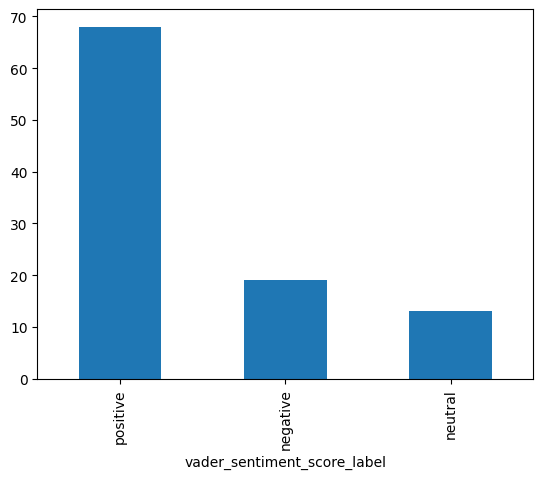

In [15]:
data['vader_sentiment_score_label'].value_counts().plot.bar()

In [16]:
transformers_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.
Loading weights: 100%|██████████| 104/104 [00:00<00:00, 620.35it/s, Materializing param=pre_classifier.weight]                                  


In [17]:
transformer_labels = []

for review in data['reveiewText_clean'].values:
    sentiment_list = transformers_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

data['transformer_sentiment_label'] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

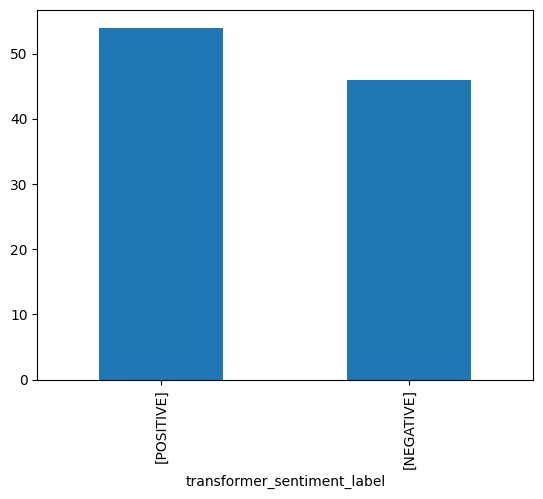

In [18]:
data['transformer_sentiment_label'].value_counts().plot.bar()